In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cardiotocographic.csv to Cardiotocographic (1).csv


## 1.DATA CLEANING

In [3]:
df=pd.read_csv('Cardiotocographic.csv')

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.shape

(2126, 14)

In [6]:
df.size

29764

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [8]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [9]:
df.fillna(df.median(),inplace=True)

In [10]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [11]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [12]:
df.duplicated().sum()


2

In [13]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [14]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(2124, 14)

In [17]:
df.size

29736

## 2.STATISTICAL SUMMARY


In [18]:
summary = df.describe().T
# Adding median and interquartile range (IQR) to the summary
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
summary = summary[['mean', 'median', 'std', 'IQR', 'min', '25%', '50%', '75%', 'max']]
summary

,mean,median,std,IQR,min,25%,50%,75%,max
LB,133.338641,133.000000,11.212447,14.000000,51.842487,126.000000,133.000000,140.000000,214.000000
AC,0.003205,0.001634,0.004374,0.005612,-0.019284,0.000000,0.001634,0.005612,0.038567
FM,0.009904,0.000000,0.067571,0.002568,-0.480634,0.000000,0.000000,0.002568,0.961268
UC,0.004394,0.004486,0.003340,0.004678,-0.014925,0.001858,0.004486,0.006536,0.030002
DL,0.001897,0.000000,0.003344,0.003292,-0.015393,0.000000,0.000000,0.003292,0.030769
DS,0.000002,0.000000,0.000141,0.000000,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,0.000174,0.000000,0.000836,0.000000,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,47.012459,49.000000,18.812403,29.000000,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,1.364345,1.200000,1.174084,1.000000,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,10.295650,0.000000,21.212676,11.000000,-91.000000,0.000000,0.000000,11.000000,182.000000


## 3.DATA VISUALIZATION


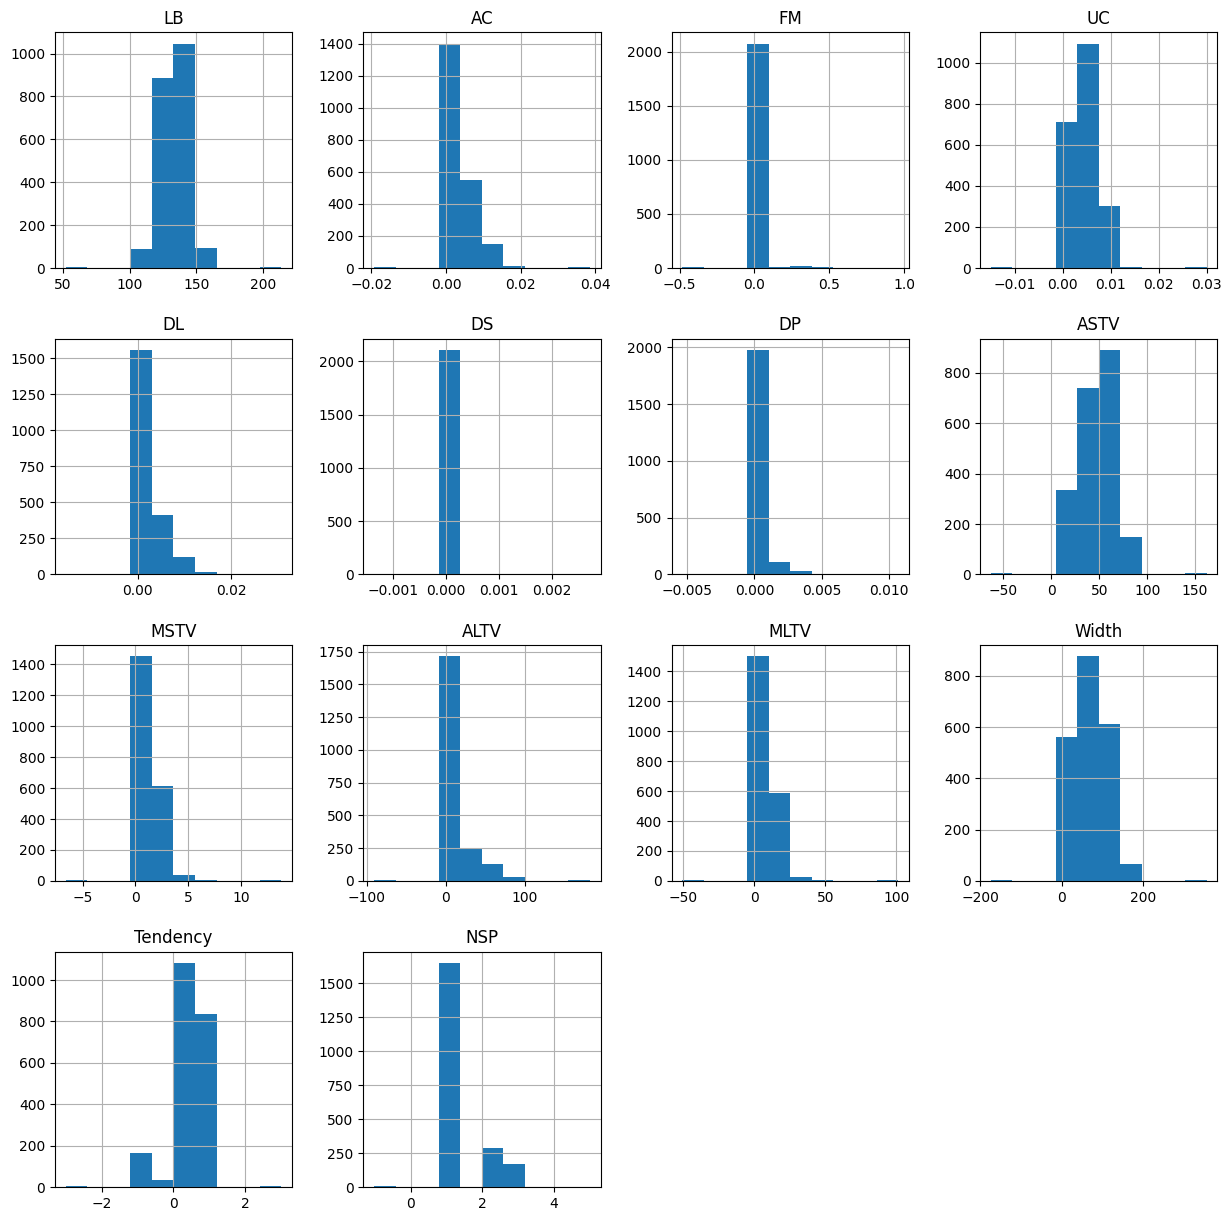

In [19]:
df.hist(figsize=(15,15))
plt.show()

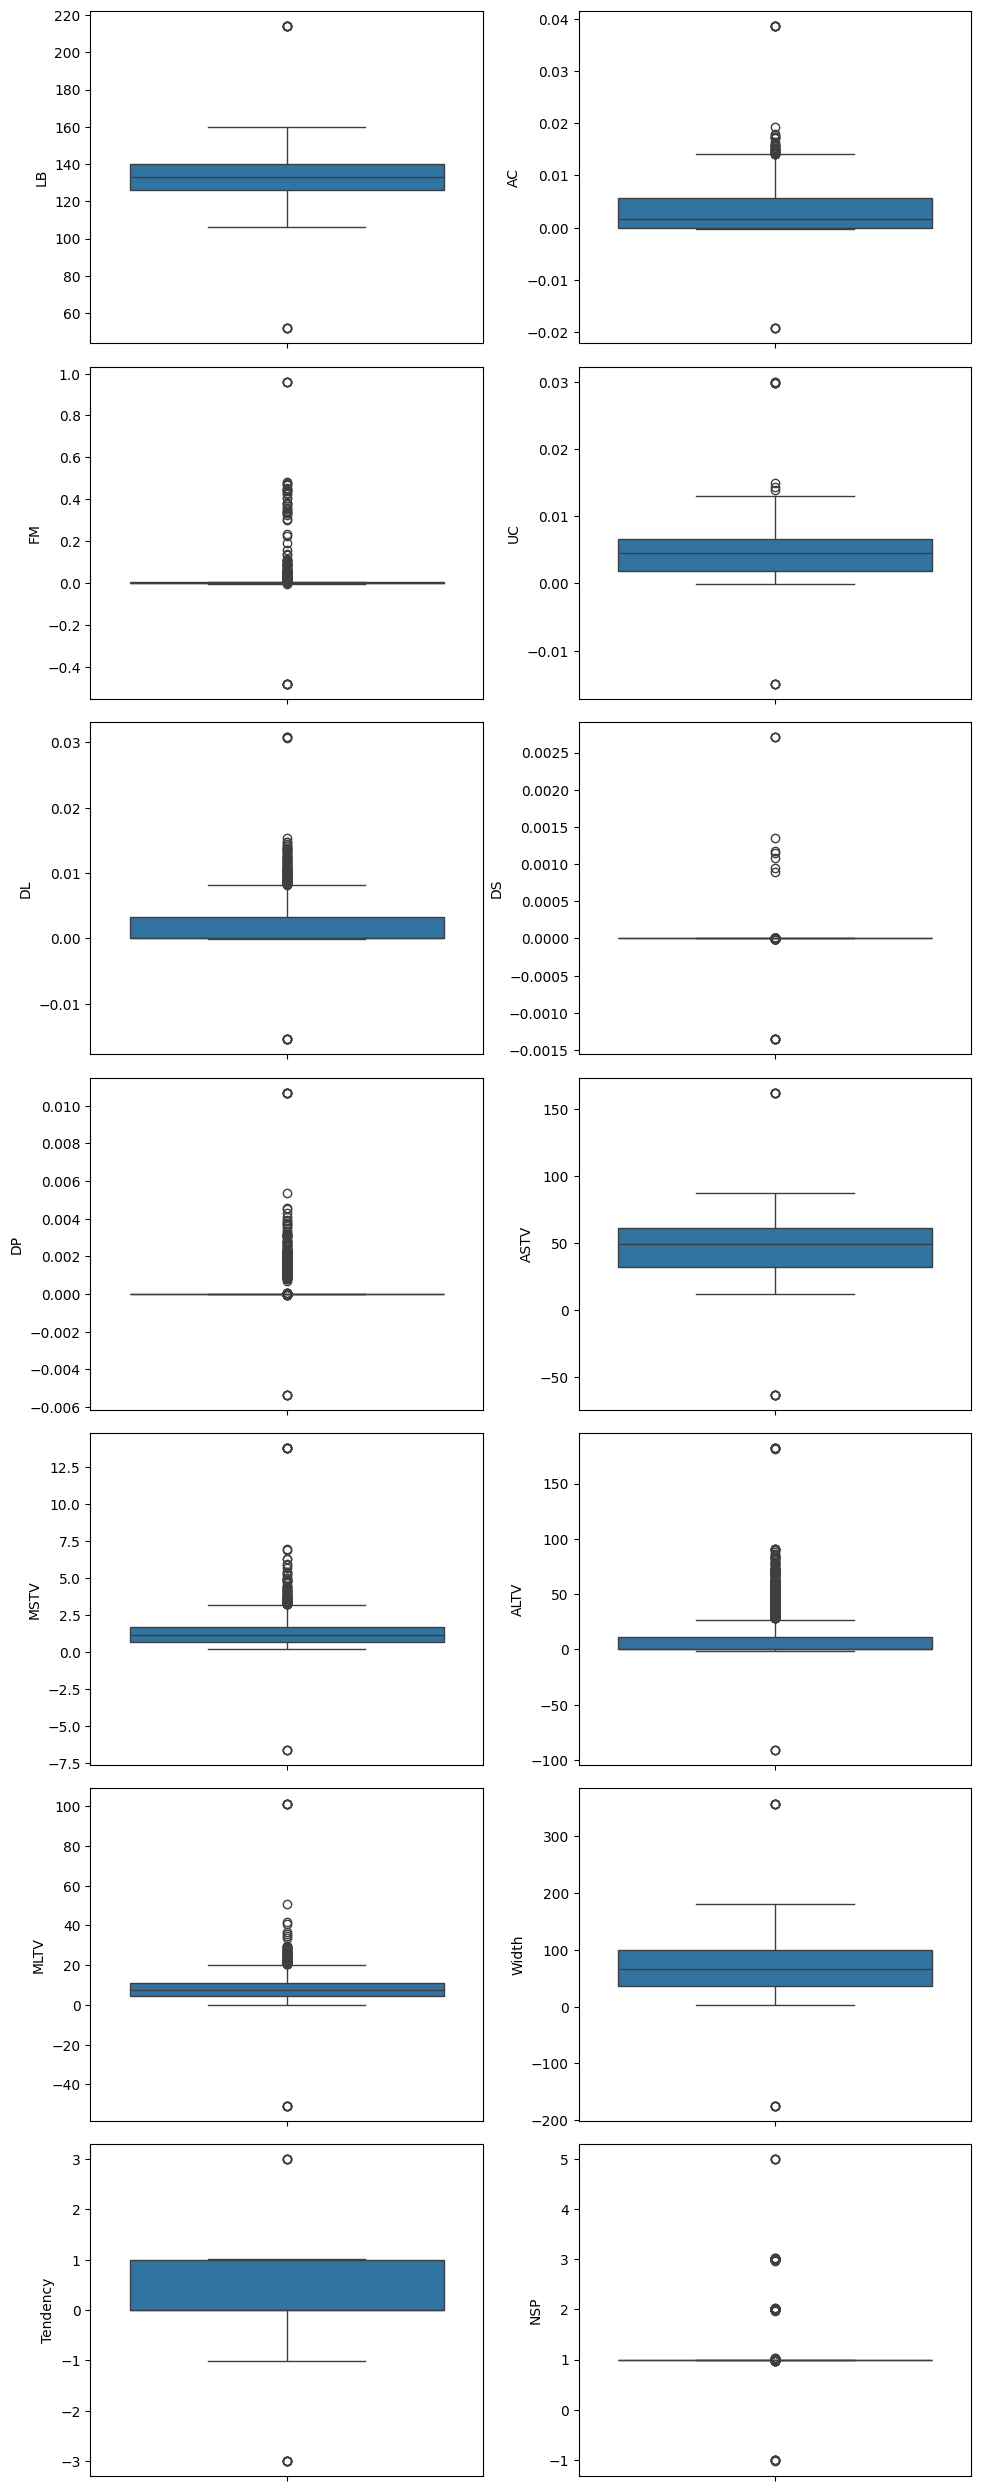

In [20]:
index,fig=plt.subplots(7,2,figsize=(10,25))
for i,col in enumerate(df.columns):
  sns.boxplot(df[col],ax=fig[i//2,i%2])
plt.tight_layout()

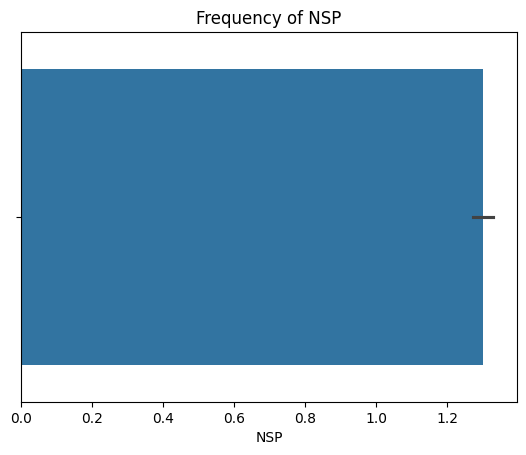

In [21]:
sns.barplot(x='NSP',data=df)
plt.title('Frequency of NSP')
plt.show()

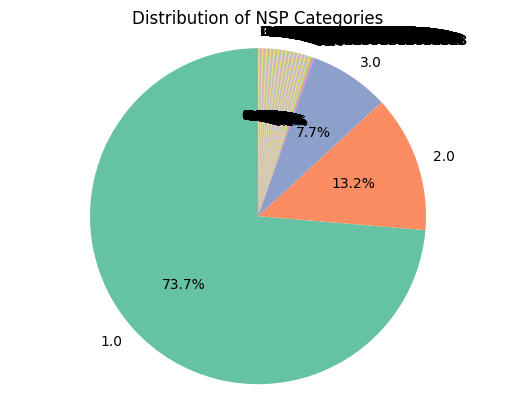

In [22]:
# Assuming 'NSP' is your categorical variable
category_counts = df['NSP'].value_counts()
labels = category_counts.index
sizes = category_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
plt.title('Distribution of NSP Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
corr=df.corr()
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063425,0.018839,-0.166669,-0.126585,-0.005433,-0.047653,0.241667,-0.169310,0.210769,-0.003190,-0.118347,0.236976,0.132003
AC,-0.063425,1.000000,0.009743,0.071313,-0.093581,-0.033097,-0.083350,-0.231086,0.133215,-0.269967,-0.104635,0.234534,0.031630,-0.311855
FM,0.018839,0.009743,1.000000,-0.053386,0.009641,0.029914,0.121434,-0.032838,0.017061,-0.012005,-0.006041,0.097204,-0.017888,0.074389
UC,-0.166669,0.071313,-0.053386,1.000000,0.189737,-0.006958,0.070144,-0.182379,0.189685,-0.227881,-0.048854,0.106474,-0.067314,-0.185766
DL,-0.126585,-0.093581,0.009641,0.189737,1.000000,0.058413,0.144631,-0.069907,0.410216,-0.187275,-0.165035,0.408340,-0.024180,0.024634
DS,-0.005433,-0.033097,0.029914,-0.006958,0.058413,1.000000,0.004317,0.008415,0.016028,-0.004344,0.034384,0.040844,-0.015304,0.065410
DP,-0.047653,-0.083350,0.121434,0.070144,0.144631,0.004317,1.000000,0.037959,0.118647,-0.077079,-0.113728,0.175363,-0.129316,0.295002
ASTV,0.241667,-0.231086,-0.032838,-0.182379,-0.069907,0.008415,0.037959,1.000000,-0.293820,0.357310,-0.219204,-0.207767,-0.011289,0.420738
MSTV,-0.169310,0.133215,0.017061,0.189685,0.410216,0.016028,0.118647,-0.293820,1.000000,-0.291979,0.028326,0.432988,-0.038010,-0.095881
ALTV,0.210769,-0.269967,-0.012005,-0.227881,-0.187275,-0.004344,-0.077079,0.357310,-0.291979,1.000000,-0.106963,-0.346228,0.038019,0.366318


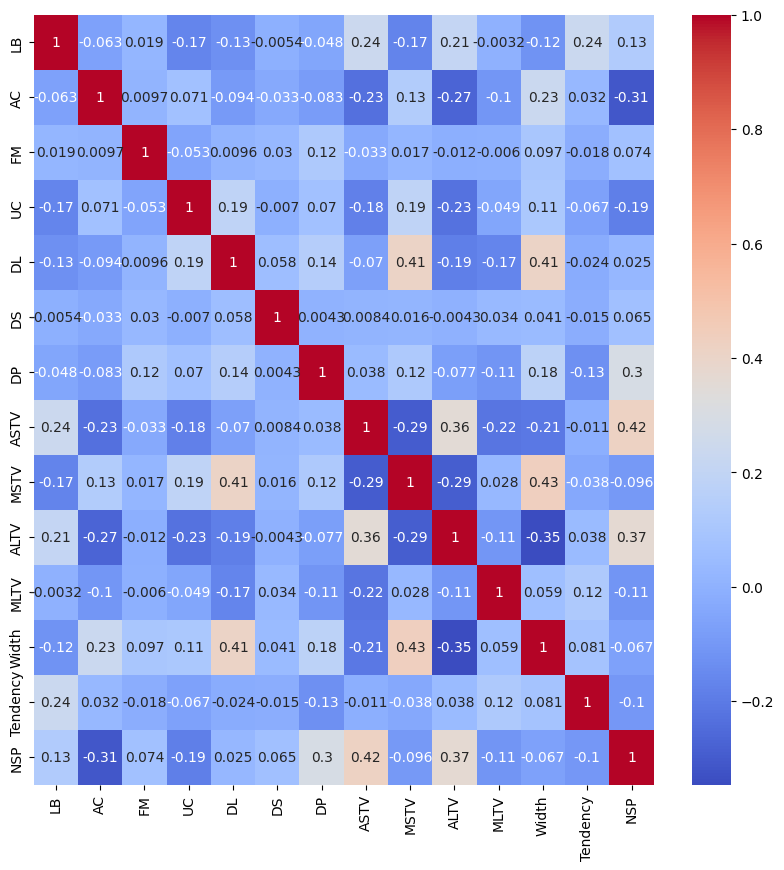

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()


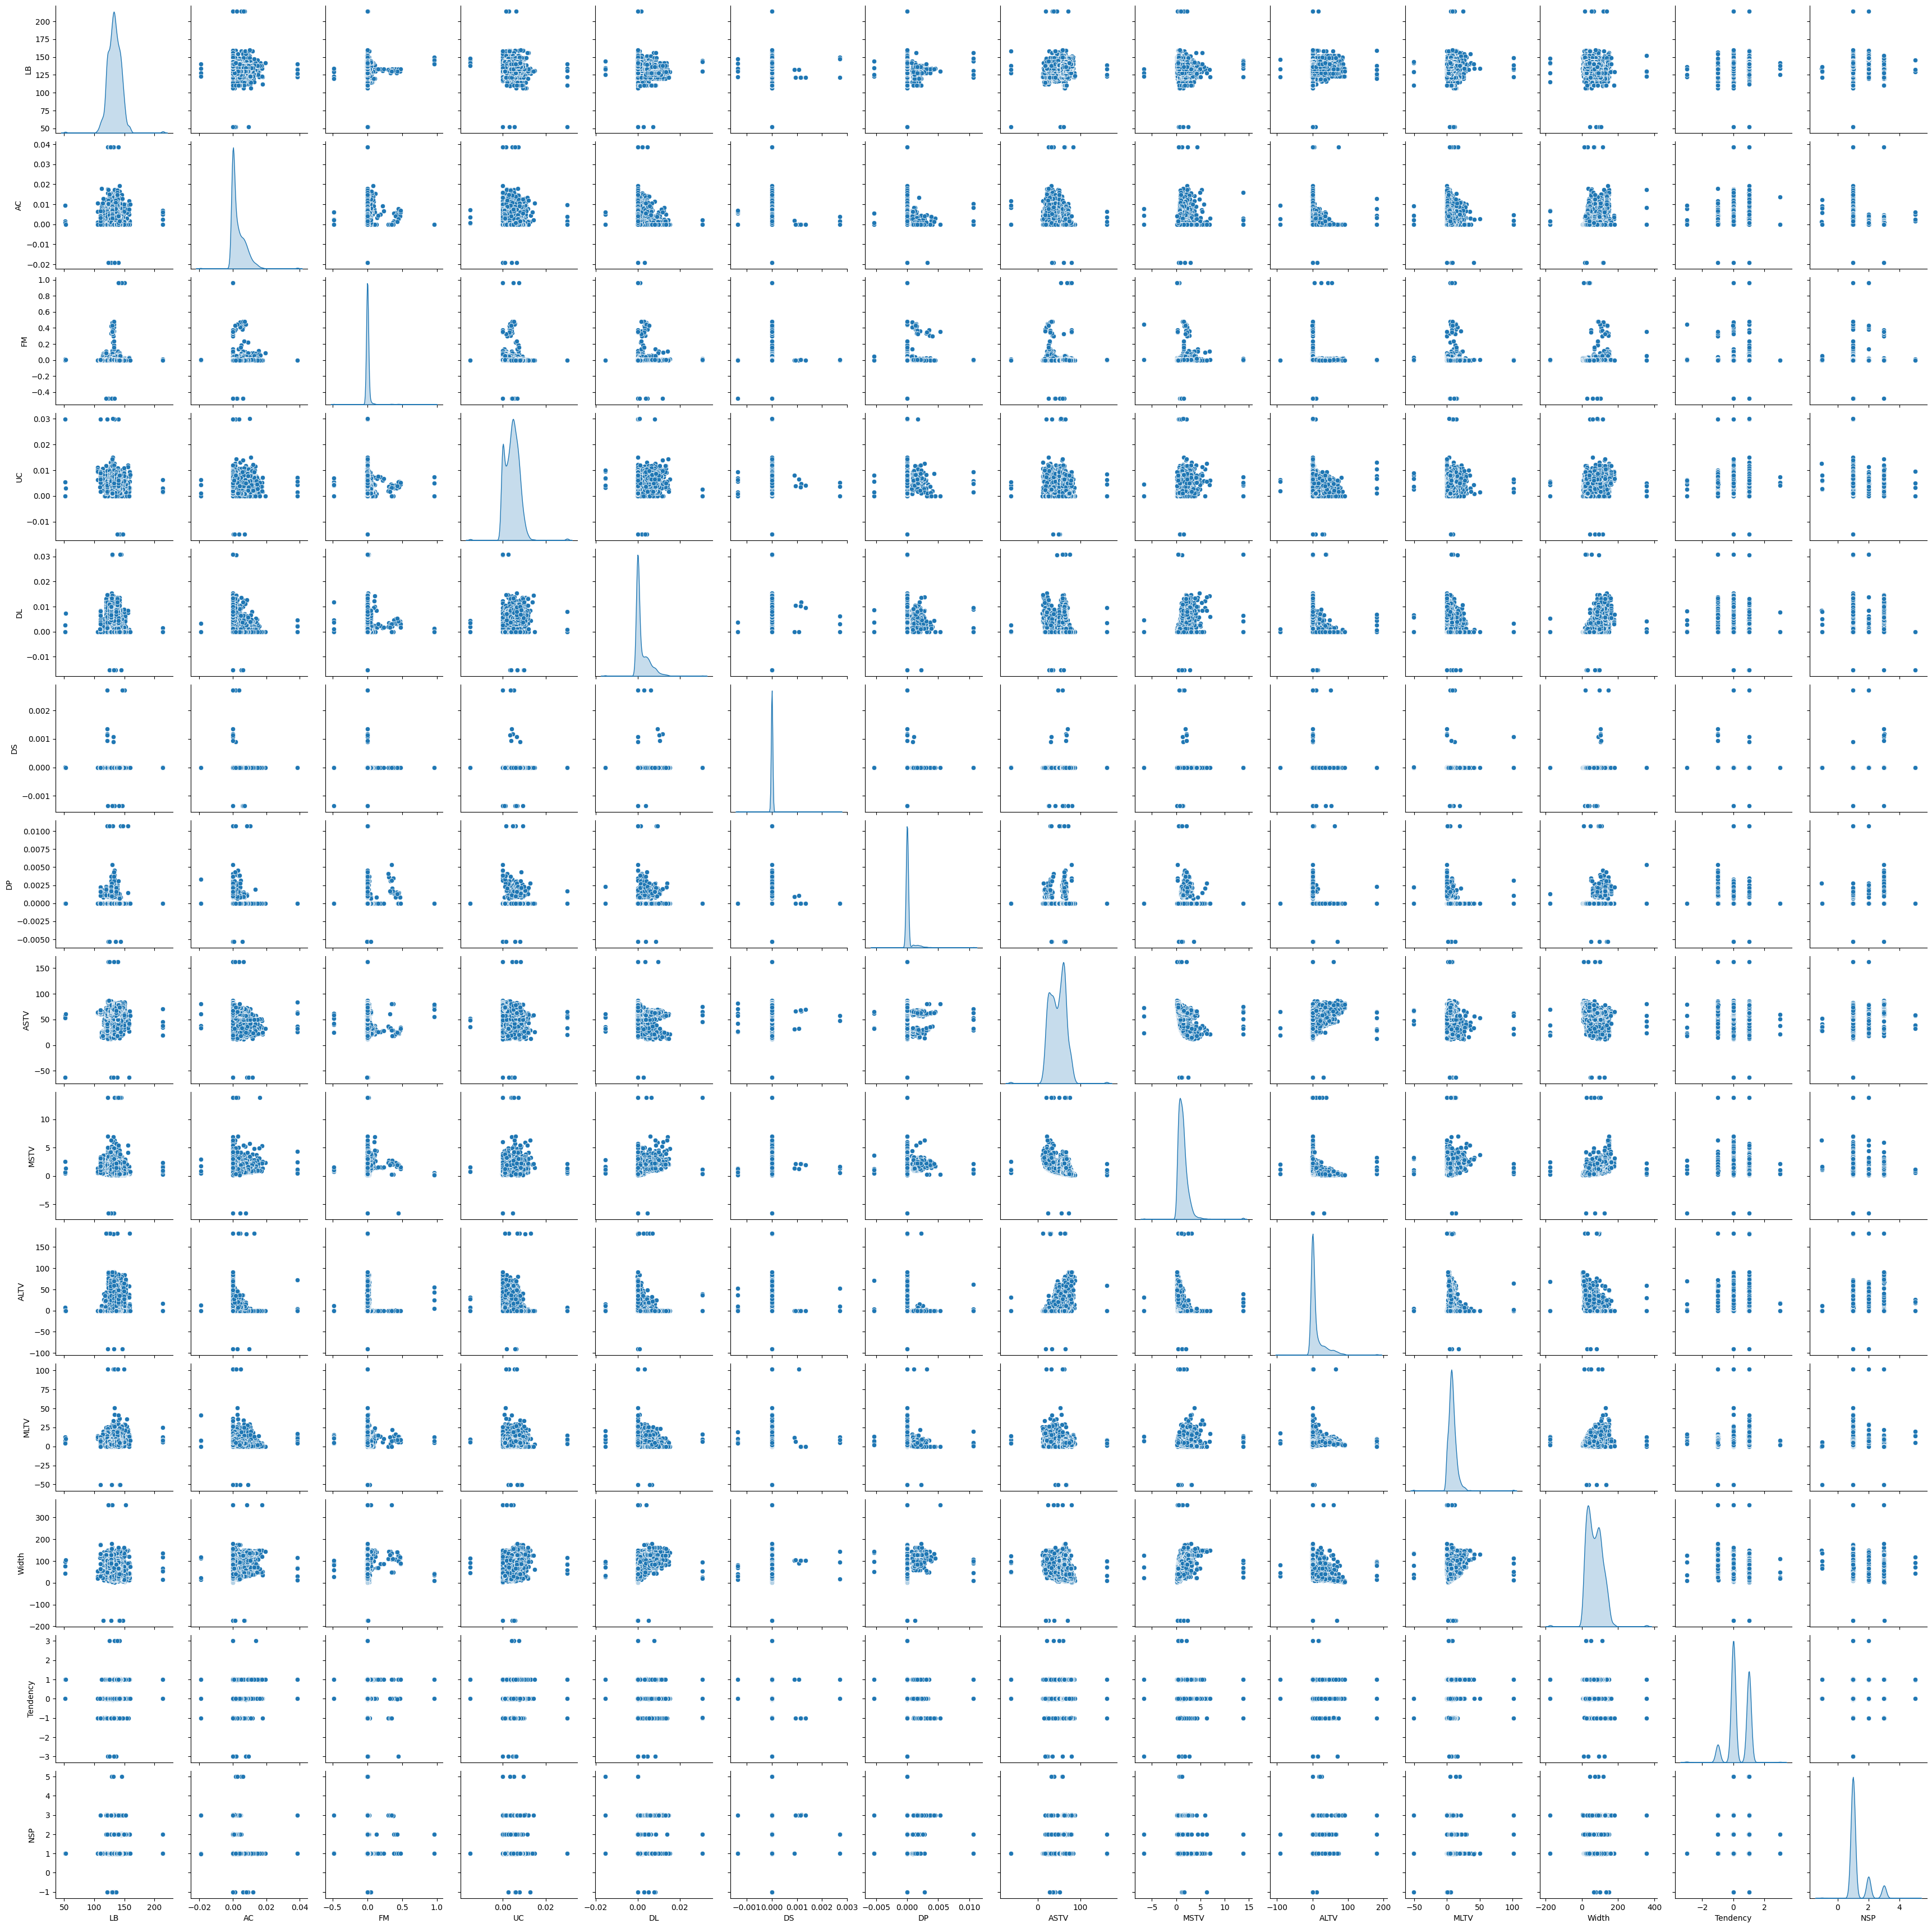

In [25]:
sns.pairplot(df,diag_kind='kde')
plt.show()

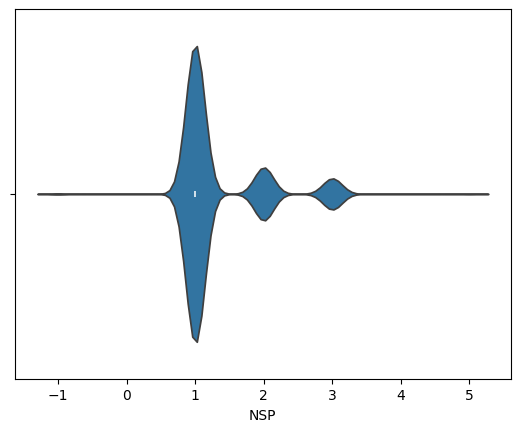

In [26]:
sns.violinplot(x='NSP',data=df)
plt.show()

## 4.PATTERN RECOGNITION AND INSIGHTS:



1.Identify any correlations between variables and discuss their potential implications.



*   **LB (Baseline Fetal Heart Rate) and ASTV (Abnormal Short Term Variability)**

**Positive Correlation**: A positive correlation between LB and ASTV indicates that as the fetal heart rate baseline increases, so does the abnormal short-term variability.

**Implication**: This could suggest that fetuses with higher baseline heart rates are more likely to experience abnormal heart rate variability, potentially indicating fetal distress or abnormal fetal health conditions. Monitoring these metrics together could provide early signs of fetal complications.
* **LB (Baseline Fetal Heart Rate) and ALTV (Abnormal Long Term Variability)**

**Moderate Positive Correlation**: A moderate positive correlation suggests that as the baseline heart rate increases, the abnormal long-term variability also increases.

**Implication**: This indicates that long-term variability in heart rate is associated with elevated heart rates, which may indicate stress or abnormal conditions in the fetus. Long-term variability can be an important factor in assessing fetal health during labor or monitoring.

* **UC (Uterine Contractions) and DL (Late Decelerations)**

**Positive Correlation**: A positive correlation between uterine contractions and late decelerations suggests that increased uterine contractions often lead to more frequent late decelerations.

**Implication**: Late decelerations during contractions are a warning sign of fetal distress, often related to a reduction in oxygen supply to the fetus. This correlation indicates that increased uterine contractions may exacerbate the issue, and medical intervention may be necessary.
* **FM (Fetal Movements) and AC (Accelerations)**

**Positive Correlation**: A strong positive correlation between fetal movements and accelerations suggests that increased fetal movements are associated with an increase in heart rate accelerations.

**Implication**: This is generally a good sign of fetal health, as fetal movements and accelerations indicate normal activity. Reduced movement and lack of accelerations could be an early indicator of reduced fetal well-being and may warrant closer monitoring.
* **LB (Baseline Fetal Heart Rate) and NSP (Outcome Class)**

Correlation between the outcome class NSP and baseline heart rate may provide insights into the classification of normal and abnormal fetal outcomes.
**Implication**: If there is a strong relationship between LB and NSP, then baseline heart rate can be used as a predictor for fetal outcomes (normal vs abnormal). This could be useful in developing predictive models for fetal well-being.

2.   Look for trends or patterns over time if temporal data is available.

There is no temporal data explicitly.
If temporal data were available, time trends could help in analyzing how key variables evolve during monitoring periods. Unfortunately, the dataset does not appear to include a specific time variable.


# 5.CONCLUSION



1.   Summarize the key insights and patterns discovered through your exploratory analysis.


*   **Data Cleaning**

The dataset was checked for missing values and duplicates. Missing values were handled using median imputation, and duplicate rows were removed to ensure data quality.


*   **Statistical Summary**

Descriptive statistics (mean, median, standard deviation, IQR, etc.) were calculated for each variable to understand the data distribution and identify potential outliers.

*   **Data Visualization**

Histograms and box plots were used to visualize the distribution of each variable and identify potential outliers.

A bar plot and pie chart were used to show the distribution of the target variable 'NSP' (fetal state class).

A heatmap was used to visualize the correlation matrix between variables.

A pair plot was used to explore relationships between pairs of variables.

Violin plots were used to compare the distribution of variables across different NSP categories.

*   **Pattern Recognition and Insights**

Positive correlations were observed between LB (Baseline Fetal Heart Rate) and ASTV (abnormal short-term variability), LB and ALTV (abnormal long-term variability), UC (Uterine Contractions) and DL (Late Decelerations), and FM (Fetal Movements) and AC (Accelerations).

These correlations suggest potential relationships between these variables and fetal health or distress.

The correlation between LB and NSP suggests that baseline heart rate could be a potential predictor of fetal outcomes.


2.Discuss how these findings could impact decision-making or further analyses.


*   **Impact on Decision-Making**

**Fetal Monitoring and Intervention**:
 The identified correlations, such as the positive correlation between uterine contractions (UC) and late decelerations (DL), can aid in real-time fetal monitoring during labor. Medical professionals can use these insights to make informed decisions about interventions, such as adjusting medication or considering operative delivery, to minimize fetal distress.

**Risk Assessment**:
 By analyzing the relationship between baseline fetal heart rate (LB) and the outcome class (NSP), clinicians can potentially assess the risk of adverse fetal outcomes. This information can be used to guide the frequency and intensity of fetal monitoring and to identify high-risk pregnancies that require closer observation.

**Personalized Treatment**:
 Understanding the interplay between variables like LB, ASTV, and ALTV can contribute to developing personalized treatment plans for pregnant individuals. This approach could involve tailoring interventions based on individual fetal characteristics and risk factors.

*   **Further Analyses**

**Predictive Modeling**:
 The observed correlations suggest that predictive models could be developed to forecast fetal outcomes based on key variables. These models could assist in identifying pregnancies at higher risk of complications, allowing for proactive management.

**Feature Engineering**:
 The insights gained from the EDA can inform feature engineering efforts for machine learning models. For example, new features could be created by combining or transforming existing variables to improve model performance.

**Hypothesis Testing**:
 Specific hypotheses can be formulated based on the identified patterns and tested using statistical methods. This could involve investigating the causal relationships between variables and their impact on fetal health.

**Comparative Studies**:
 The findings can be compared with similar studies conducted on different populations or datasets. This can help to validate the results and identify potential variations in fetal monitoring parameters across different demographics or clinical settings.

 **Overall Impact**

The exploratory data analysis has provided valuable insights into the relationships between various cardiotocographic features and fetal outcomes. These findings have the potential to improve fetal monitoring practices, enhance risk assessment, and guide personalized treatment strategies. By applying these insights and conducting further analyses, healthcare professionals can strive to improve the quality of care for pregnant individuals and their babies.

